In [30]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import math

### 1a

In [13]:
exposome = pd.read_csv('exposome.csv')
continine_combined = []
for i in set(exposome['hs_cotinine_mcat_None']):
    for j in set(exposome['hs_cotinine_cdich_None']):
        continine_combined.append(i + '_' + j)
column_new = []

for i in range(len(exposome)):
    column_new.append(continine_combined[random.randint(0, len(continine_combined) - 1)])

exposome['cotinine_combination'] = column_new
print(exposome['cotinine_combination'])
unique_values = exposome['cotinine_combination'].unique()
print("\nCotinine unique values: ", unique_values)
counts = exposome['cotinine_combination'].value_counts()
print("\nCotinine count of all values:\n", counts)

0       Non-smokers_Undetected
1       SHS smokers_Undetected
2       SHS smokers_Undetected
3       SHS smokers_Undetected
4       Non-smokers_Undetected
                 ...          
1296      SHS smokers_Detected
1297      SHS smokers_Detected
1298    Non-smokers_Undetected
1299    Non-smokers_Undetected
1300      SHS smokers_Detected
Name: cotinine_combination, Length: 1301, dtype: object

Cotinine unique values:  ['Non-smokers_Undetected' 'SHS smokers_Undetected' 'Non-smokers_Detected'
 'Smokers_Undetected' 'SHS smokers_Detected' 'Smokers_Detected']

Cotinine count of all values:
 SHS smokers_Undetected    234
Smokers_Undetected        225
SHS smokers_Detected      220
Non-smokers_Detected      215
Non-smokers_Undetected    210
Smokers_Detected          197
Name: cotinine_combination, dtype: int64


### 1b


County unique values:  ['Alameda' 'Butte' 'Contra Costa' 'Fresno' 'Humboldt' 'Imperial' 'Kern'
 'Kings' 'Los Angeles' 'Madera' 'Marin' 'Merced' 'Monterey' 'Napa'
 'Orange' 'Placer' 'Riverside' 'Sacramento' 'San Bernardino' 'San Diego'
 'San Francisco' 'San Joaquin' 'San Luis Obispo' 'San Mateo'
 'Santa Barbara' 'Santa Clara' 'Solano' 'Sonoma' 'Stanislaus' 'Sutter'
 'Tulare' 'Ventura' 'Yolo']
Los Angeles        4641
Riverside          2602
San Bernardino     2288
San Diego          2085
Alameda            1985
Santa Barbara      1547
Fresno             1523
Contra Costa       1252
Sacramento         1162
Orange             1077
Ventura             714
San Luis Obispo     614
Santa Clara         545
San Joaquin         505
Kern                477
Imperial            358
Humboldt            340
San Mateo           335
Marin               334
San Francisco       334
Sonoma              330
Napa                319
Solano              304
Stanislaus          273
Monterey            272
Plac

<AxesSubplot:title={'center':'Counties Distribution'}, xlabel='County Name', ylabel='Count'>

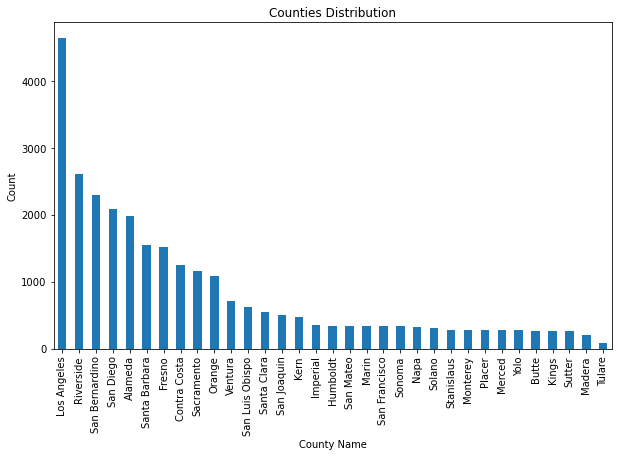

In [25]:
NO2_2020_California = pd.read_csv('NO2_2020_CA.csv')
unique_no2_values = NO2_2020_California['COUNTY'].unique()
print("\nCounty unique values: ", unique_no2_values)
no2_counts = NO2_2020_California['COUNTY'].value_counts()
print(no2_counts)
no2_counts.plot(kind='bar', title='Counties Distribution', figsize=(10,6), xlabel='County Name', ylabel='Count')

### 2a

        ID    cotinine_combination  hs_asthma
2        3  SHS smokers_Undetected          1
5        6    Non-smokers_Detected          1
7        8  SHS smokers_Undetected          1
9       10      Smokers_Undetected          1
14      15      Smokers_Undetected          1
...    ...                     ...        ...
1246  1247  SHS smokers_Undetected          1
1252  1253  Non-smokers_Undetected          1
1259  1260  SHS smokers_Undetected          1
1274  1275    Non-smokers_Detected          1
1298  1299  Non-smokers_Undetected          1

[142 rows x 3 columns]
Non-smokers_Undetected    28
SHS smokers_Undetected    27
Smokers_Detected          23
Smokers_Undetected        22
SHS smokers_Detected      21
Non-smokers_Detected      21
Name: cotinine_combination, dtype: int64


<AxesSubplot:title={'center':'Count of Cotinine Combination values which have asthma'}, xlabel='cotinine_combination', ylabel='Count'>

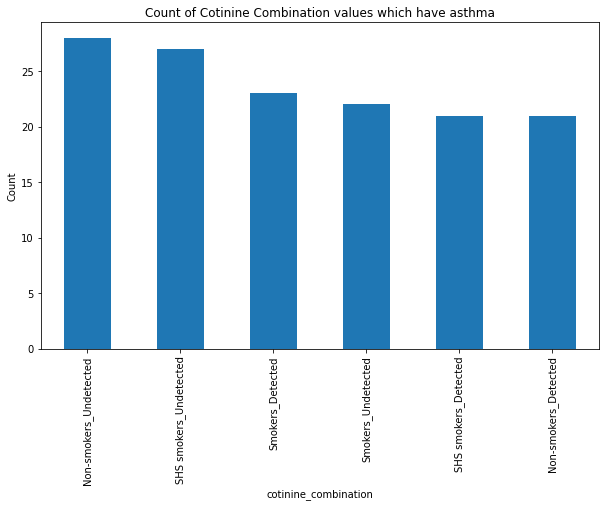

In [22]:
phenotype = pd.read_csv('phenotype.csv')
new_df = pd.DataFrame({'ID': exposome['ID'], 'cotinine_combination': exposome['cotinine_combination'], 'hs_asthma': phenotype['hs_asthma']})
filtered_df = new_df[new_df['hs_asthma'] == 1]
print(filtered_df)
plot_counts = filtered_df['cotinine_combination'].value_counts()
print(plot_counts)
plot_counts.plot(kind='bar', title='Count of Cotinine Combination values which have asthma', figsize=(10,6), xlabel='cotinine_combination', ylabel='Count')


### 3a,b

In [53]:
school_coordinate = [33.884720, -117.331310]
nearest = []
min_dist = float('inf')

for i, r in NO2_2020_California.iterrows():
    if math.dist(school_coordinate, [r['SITE_LATITUDE'], r['SITE_LONGITUDE']]) < min_dist:
        min_dist = math.dist(school_coordinate, [r['SITE_LATITUDE'], r['SITE_LONGITUDE']])
        nearest = [r['SITE_LATITUDE'], r['SITE_LONGITUDE']]
        
nearest_cor = NO2_2020_California[NO2_2020_California['SITE_LATITUDE'] == nearest[0]]
nearest_cor = monitor[monitor['SITE_LONGITUDE'] == nearest[1]]
print(nearest_cor)

             Date Source   Site ID  POC  Daily Max 1-hour NO2 Concentration  \
15131    1/1/2020    AQS  60658001    2                                30.0   
15132    1/2/2020    AQS  60658001    2                                38.2   
15133    1/3/2020    AQS  60658001    2                                40.2   
15134    1/4/2020    AQS  60658001    2                                41.1   
15135    1/5/2020    AQS  60658001    2                                30.2   
...           ...    ...       ...  ...                                 ...   
15844  12/27/2020    AQS  60658001    3                                25.6   
15845  12/28/2020    AQS  60658001    3                                22.8   
15846  12/29/2020    AQS  60658001    3                                25.4   
15847  12/30/2020    AQS  60658001    3                                38.4   
15848  12/31/2020    AQS  60658001    3                                31.1   

      UNITS  DAILY_AQI_VALUE Site Name  DAILY_OBS_C

### 3c

In [50]:
nearest_cor['Date'] = pd.to_datetime(nearest_cor['Date'])
nearest_cor['month'] = nearest_cor['Date'].apply(lambda x: x.strftime('%m'))
grouped_vals = nearest_cor.groupby('month')['Daily Max 1-hour NO2 Concentration'].agg(['min', 'max', 'mean'])
print(grouped_vals)

        min   max       mean
month                       
01     17.0  42.9  33.346774
02      4.4  47.1  32.884483
03      5.5  40.7  23.253333
04      4.1  39.8  20.180000
05      4.3  51.6  20.096774
06      3.0  49.6  15.813333
07      7.4  51.2  17.829032
08      6.1  47.8  22.804839
09     11.8  56.0  38.426000
10      8.1  59.4  36.463333
11     11.9  66.4  39.388333
12     22.8  57.1  36.395161


### 3d

<AxesSubplot:title={'center':'Min Max Avg Distribution'}, xlabel='Months', ylabel='Values'>

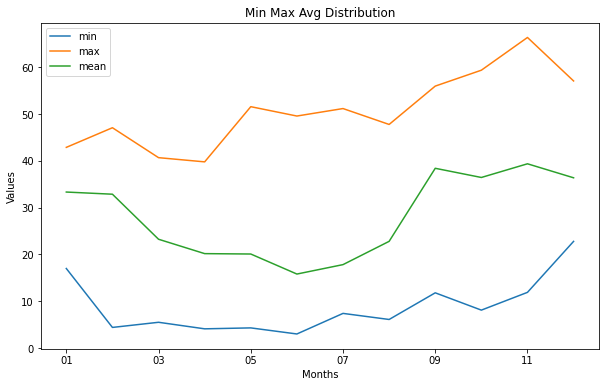

In [52]:
grouped_vals.plot(kind='line', title='Min Max Avg Distribution', figsize=(10,6), xlabel='Months', ylabel='Values')